CS110 Assignment 1

Ziquan Fu

2019.02

- (#sort) Implement three-way merge sort in Python. It should at a minimum accept lists of integers as input and you should provide at least three test cases that demonstrate the correctness of your code.

Code: 

See Appendix 1.

- (#sort) Implement a second version of three-way merge sort that calls insertion sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying insertion sort.

Code: 

See Appendix 2. In this code, I chose k=10 to be the threshold for insertion sort.

Explanation: 

I implemented an augmented three-way merge sort that calls the insertion sort. The running time of a three-way merge sort, similar to a regular merge sort, can be written as T(n)=3T(n/3)+O(n), because at each level of the recursion tree, we divide the problem to 3 subproblems and solve each of them. There are together log_3(n)+1 levels (including the root), and each level we have c·n, where c is a constant to represent the linear O(n) individual running time. 

Thus, the three-way merge sort has a running time of O(nlog_3(n)).

Assume that when the array is shorter than k, we will apply insertion sort. Therefore, when we draw the recursion tree to the level where each subarray has k elements, we will have log_3(n/k)+1 levels in total. Since each level the running time is the linear O(n), we will have the total running tim O(nlog_3(n/k)). For the insertion sort part, there will be n/k subarrays, each with length k. We know that the running time of insertion sort is O(n^2), so the running time of the insertion part will be O((n/k)·k^2), which is O(n·k).

Therefore, the total running time of the augmented merge sort will be O(nlog_3(n/k)+n·k). If we want to improve the original three-way merge sort, we simply need to find a k to satisfy: O(nlog_3(n)-nlog_3(k)+n·k) < O(n·log_3(n)). Consider the case where the two sides are equal to each other, then the nlog_3(n)-nlog_3(k)+n·k must be equal to n·log_3(n) if we disregard the constant term. Therefore, it is obvious that if k=log_3(n), nlog_3(n)-nlog_3(k)+n·k = 2n·log_3(n)-nlog_3(log_3(n)). Since log_3(n) is significantly smaller than n when n grows larger, this expression simply becomes O(nlog_3(n)), which equals to the original merge sort. When k<log_3(n), the augmented merge sort will have less complexity than the original merge sort.

- (#complexity, #optimalalgorithm) Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the augmented merge sort from (2) by producing a plot that illustrates how each running time grows with input size. Make sure to:

    (1) define what each algorithm's complexity is
    
    (2) enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
    
    (3) and compare your benchmarks with the theoretical result we have discussed in class.

Plots: 

See Appendix 3 to 4. For the code of regular merge sort, see Appendix 6. For the code of plotting, see Appendix 7.

Explanation:

As shown in Appendix 3 to 4, the augmented merge sort outperforms the other two algorithms, especially when the input size grows larger. Also, as input size grows bigger, the two-way merge sort gets slightly faster than three-way merge sort. Lastly, for the larger input size, k=10 outperforms k=3. The reason is that for a smaller input size, insertion sort is likely to be faster than merge sort. The explanation will be provided below in section 3.

(1) As proved in question (2), the running time of the three-way merge sort is O(nlog_3(n)), the running time of the augmented merge sort is O(nlog_3(n/k)+n·k), and that of the regular merge sort is O(nlgn).

(2) There are several assumptions made in the process of analyzing the running time. First, when calculating the time complexity, each "step" or instruction the algorithms execute takes the same amount of time. We assume that variable assignments, arithmatic operations and array operations all take the same time, while in reality it is not true. Second, we assume that the condition of the computer hardware/software does not change when running these algorithms. This can include temperature, CPU status, memory, and the software in which we run the Python code. We make the assumption that all of these conditions stay the same over time in which we test the algorithms. Third, when calculating the time complexity of the three-way merge sort, we assume that the input size is a multiple of 3 (same as we assume the input size is a multiple of 2 in two-way merge sort). Last, when assessing the running time with the code, I used randomly generated numpy arrays. The assumption is that the randomly generated array is truly "random" in that it perfectly represents the average case. Other wise, for example, though the chance is extremely low, if the randomly generated array is the worst case, insertion sort will always outperform merge sort (O(n) versus O(nlogn)), but on average, when n is sufficiently large, merge sort will likely to outperform insertion sort (O(n^2) versus O(nlogn)).

(3) From the big-Oh notation of the running time, we would probably expect the three-way merge sort to have the lowest running time. However, the result shows exactly the opposite. This is because of the constant terms that we disregard when calculating the big-Oh notation. For example, we know that for a given n>0, nlog_3(n)<nlgn, but this does not mean that three-way merge sort is faster than the regular one. In fact, from the plots, we would expect the constant term in the regular merge sort be smaller than that in the three-way merge sort, so that c1·nlog_3(n) > c2·nlgn. Also, the insertion sort outperforms merge sort when input size is not large. This is because the running time of insertion sort is actually between O(n) and O(n^2). For the best case, insertion sort will have a linear running time. Imagine we have k=9 and an input size 3^10. We would have 3^8 subarrays at the level where we implement insertion sort. Among these 3^8 arrays, we can expect a decent number of best cases and semi-best cases, hence a lower running time for augmented merge sort compared with normal merge sort.

In [65]:
##########Appendix 1: Three-way merge sort##########

###Three-way mergesort
def threeway_mergesort(inputarr):
    
    #If the input is None, return None
    if len(inputarr)==0:
        return None
    
    #If there is only one element, return that one-element array
    if len(inputarr)==1:
        return inputarr
    
    #If there are only two elements in the array, directly compare them and sort
    if len(inputarr)==2:
        if inputarr[0]<=inputarr[1]:
            return inputarr
        else:
            return [inputarr[1],inputarr[0]]
        
    #If there are more than two elements in the array, divide into sub problems then conquer
    if len(inputarr)>2:
        #Compute the indices of the 1/3 and 2/3 of the array to divide the array into three subarrays
        firstindex=len(inputarr)//3
        firstsub=inputarr[:firstindex]
        secondindex=firstindex+len(firstsub)
        secondsub=inputarr[firstindex:secondindex]
        thirdsub=inputarr[secondindex:]
        
        #Recursively merge sort the subarrays
        firstsub=threeway_mergesort(firstsub)
        secondsub=threeway_mergesort(secondsub)
        thirdsub=threeway_mergesort(thirdsub)
        
        #Merging the divided subarrays
        #First adding an infinitely large element to the end of each subarray
        firstsub.append(float('inf'))
        secondsub.append(float('inf'))
        thirdsub.append(float('inf'))
        
        #Initialize the output array and indices
        outputarr=[]
        i=0
        j=0
        k=0
        
        #Merge the arrays
        #Compare the first element of each array, and add the smallest one to the output array, 
        #then move forward the index of that subarray by one element
        while i<len(firstsub) and j<len(secondsub) and k<len(thirdsub):
            if firstsub[i]<=secondsub[j] and firstsub[i]<=thirdsub[k]:
                outputarr.append(firstsub[i])
                i=i+1
            elif secondsub[j]<=firstsub[i] and secondsub[j]<=thirdsub[k]:
                outputarr.append(secondsub[j])
                j=j+1
            else:
                outputarr.append(thirdsub[k])
                k=k+1
        #The infinitely large terms at the end of each subarray make sure that the merge process can continue 
        #until all the non-infinite integers are sorted.
        #The last iteration adds one infinite term to the end of the output array, 
        #so we need to remove the last element of the output
        outputarr.pop()
    
        return(outputarr)

###Test cases

#Worst case
test1=[10,9,8,7,6,5,4,3,2,1,0]
#Less than 3 elements - no divide procedure
test2=[1,2]
#Input = None
test3=[]

#For a more strict test, I also checked when the input is a multiple of 3 (the worst case already includes 
#the case when the input is not a multiple of 3)
test4=[4,3,6,5,2,8]
#And another case for all input elements being the same
test5=[6,6,6,6,6,6,6]

print(threeway_mergesort(test1))
print(threeway_mergesort(test2))
print(threeway_mergesort(test3))
print(threeway_mergesort(test4))
print(threeway_mergesort(test5))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2]
None
[2, 3, 4, 5, 6, 8]
[6, 6, 6, 6, 6, 6, 6]


In [66]:
##########Appendix 2: Augmented three way merge sort##########

###Augmented three-way merge sort

#Insertion sort
def insertion_sort(inputarr):
    j=1    
    while j<len(inputarr):        
        key = inputarr[j]        
        i=j-1       
        while i>=0 and key<inputarr[i]:           
            inputarr[i+1]=inputarr[i]           
            inputarr[i]=key
            i=i-1                  
        j=j+1
    return inputarr

#Augmented merge sort, with insertion sort on the input array that has less than or equal to 10 integers
def new_mergesort(inputarr):
    
    #Three-way merge sort for input array that has more than 10 elements
    if len(inputarr)>10:
        firstindex=len(inputarr)//3
        firstsub=inputarr[:firstindex]
        secondindex=firstindex+len(firstsub)
        secondsub=inputarr[firstindex:secondindex]
        thirdsub=inputarr[secondindex:]
    
        firstsub=new_mergesort(firstsub)
        secondsub=new_mergesort(secondsub)
        thirdsub=new_mergesort(thirdsub)
    
        firstsub.append(float('inf'))
        secondsub.append(float('inf'))
        thirdsub.append(float('inf'))
        
        outputarr=[]
        i=0
        j=0
        k=0
    
        while i<len(firstsub) and j<len(secondsub) and k<len(thirdsub):
            if firstsub[i]<=secondsub[j] and firstsub[i]<=thirdsub[k]:
                outputarr.append(firstsub[i])
                i=i+1
            elif secondsub[j]<=firstsub[i] and secondsub[j]<=thirdsub[k]:
                outputarr.append(secondsub[j])
                j=j+1
            else:
                outputarr.append(thirdsub[k])
                k=k+1
            
        outputarr.pop()
    
        return(outputarr)
    
    #For input array less than or equal to 10 elements, use insertion sort
    else:
        return(insertion_sort(inputarr))

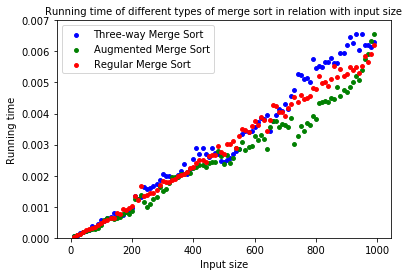

In [67]:
##########Appendix 3: Running time comparison - augmented merge sort with threshold k=3##########

from IPython.display import Image
filename1 = "/Users/Furankyyy/Desktop/fig 1.png" 
Image(filename1)

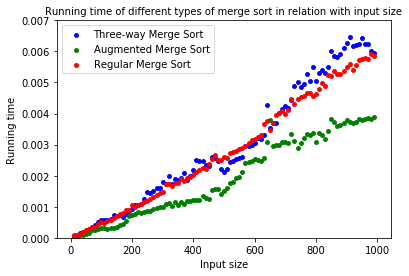

In [68]:
##########Appendix 4: Running time comparison - augmented merge sort with threshold k=10##########
filename2 = "/Users/Furankyyy/Desktop/fig.3.png" 
Image(filename2)

In [69]:
##########Appendix 5: Regular merge sort##########

###Regular merge sort
def reg_mergesort(inputarr):
    
    #If the array has more than 1 element, divide and conquer
    if len(inputarr)>1:
        #Compute the mid index and divide the array
        mid=len(inputarr)//2
        leftside=inputarr[:mid]
        rightside=inputarr[mid:]
        
        #Recursively sort the subarraya on both sides
        leftside=reg_mergesort(leftside)
        rightside=reg_mergesort(rightside)
        
        #Same as the three-way merge sort, first add an infinite term to the end of the subarrays, then initialize 
        #the output
        leftside.append(float('inf'))
        rightside.append(float('inf'))
    
        outputarr=[]
        i=0
        j=0
        
        #Merge the arrays
        #Compare the first element of both subarrays, take the smaller one out and add it to the output array, 
        #then move the index of that subarray forward
        while i<len(leftside) and j<len(rightside):
            if leftside[i]<=rightside[j]:
                outputarr.append(leftside[i])
                i=i+1
            else:
                outputarr.append(rightside[j])
                j=j+1
        
        #Same as the three-way merge sort, the last element added to the output array should be the infinite term, 
        #pop it out
        outputarr.pop()
    
        return(outputarr)
    
    #If the array has less than 2 elements, return the array itself
    else:  
        return(inputarr)

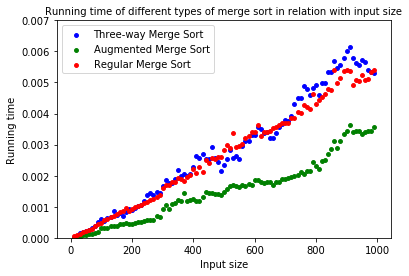

In [70]:
##########Appendix 6: Code for producing the plots##########

import timeit
import numpy as np
import matplotlib.pyplot as plt
    
###Plot the data

#Initialize numpy arrays for data collection
data_threeway=np.empty((1,2))
data_augmented=np.empty((1,2))
data_reg=np.empty((1,2))

#Generate randomly permutated arrays from length 10 to 1000, with step = 10
#Use timeit module to record the time of running each algorithm for 100 times, 
#then calculate the average running time
#Record the average running time for each input size i
for i in range(10,1000,10):   
    testlist=list(np.random.permutation(i))
    
    #Run the algorithms with timeit module to collect running time
    time_threeway=timeit.timeit(stmt="threeway_mergesort(testlist)",
                                setup="from __main__ import threeway_mergesort,testlist",number=100)
    time_augmented=timeit.timeit(stmt="new_mergesort(testlist)",
                                 setup="from __main__ import new_mergesort,testlist",number=100)
    time_reg=timeit.timeit(stmt="reg_mergesort(testlist)",
                           setup="from __main__ import reg_mergesort,testlist",number=100)
    
    time_threeway = time_threeway/100
    time_augmented = time_augmented/100
    time_reg=time_reg/100
    
    stack_threeway=np.array((time_threeway,i))
    stack_augmented=np.array((time_augmented,i))
    stack_reg=np.array((time_reg,i))
    
    #Collect all data
    data_threeway=np.vstack((data_threeway,stack_threeway))
    data_augmented=np.vstack((data_augmented,stack_augmented))
    data_reg=np.vstack((data_reg,stack_reg))

#The first row for each array is None, so deselect the first rows
data_threeway=data_threeway[1:]
data_augmented=data_augmented[1:]
data_reg=data_reg[1:]

#Plot the data
plt.figure()
plt.ylim(0,0.007)
plt.scatter(x=data_threeway[:,1],y=data_threeway[:,0],color='blue',label='Three-way Merge Sort',s=15)
plt.scatter(x=data_augmented[:,1],y=data_augmented[:,0],color='green',label='Augmented Merge Sort',s=15)
plt.scatter(x=data_reg[:,1],y=data_reg[:,0],color='red',label='Regular Merge Sort',s=15)
plt.legend(loc='upper left')
plt.xlabel('Input size')
plt.ylabel('Running time')
plt.title('Running time of different types of merge sort in relation with input size',fontsize=10)
plt.show()


Appendix 7: HCs

induction: In question 2, I used mathematical induction to prove a reasonable threshold for k. I construct the mathematical expressions of the running time and then established an inequality to solve. The justification derived from the induction is more reasonable than a simple hypothesis generated through empirical evidence, because the running time is subject to various assumptions discussed in question 3. Therefore, in question 2, I gave a pure mathemtical explanation of a proper bound of k.

sampling: As shown in question 3, there is a explicit assumption that the test cases we use represent the "average" case. However, simply building a test case ourselves cannot fulfill this assumption. This is why I used the numpy.random.permutation() function and the timeit module. In essence, this is a problem of sampling. In order to get an average case, I need to count for any fluctuations from the mean, to obtain a better sample from the distribtion of running time. In Appendix 6, I showed that I use a randomly generated array from the distribution, and run each algorithm 100 times and calculate their average (sampling 100 times and calculate average). This method underlies a deep consideration of probability distribution and sampling.